In [63]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [64]:
tickers = ['MSTR', 'ADBE', 'NVO', 'BTC-USD']

In [65]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Download historical data from yf API
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# download data to csv using tickers names and end_date as filename
data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# ffill missing values using forward fill method
df = df.ffill()

# Convert all values to float
df = df.astype(float)

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

[*********************100%***********************]  4 of 4 completed


Ticker        MSTR                                        BTC-USD  \
Price         Open    High     Low   Close    Volume         Open   
Date                                                                
2020-01-01     NaN     NaN     NaN     NaN       NaN  7194.892090   
2020-01-02  14.284  14.489  14.272  14.431  276000.0  7202.551270   
2020-01-03  14.302  14.489  14.280  14.357  585000.0  6984.428711   
2020-01-04  14.302  14.489  14.280  14.357  585000.0  7345.375488   
2020-01-05  14.302  14.489  14.280  14.357  585000.0  7410.451660   

Ticker                                                                 NVO  \
Price              High          Low        Close        Volume       Open   
Date                                                                         
2020-01-01  7254.330566  7174.944336  7200.174316  1.856566e+10        NaN   
2020-01-02  7212.155273  6935.270020  6985.470215  2.080208e+10  26.487124   
2020-01-03  7413.715332  6914.996094  7344.884277  2.811148e+10  25.851180   
2020-01-04  7427.385742  7309.514160  7410.656738  1.844427e+10  25.851180   
2020-01-05  7544.497070  7400.535645  7411.317383  1.972507e+10  25.851180   

Ticker                                                        ADBE  \
Price            High        Low      Close     Volume        Open   
Date                                                                 
2020-01-01        NaN        NaN        NaN        NaN         NaN   
2020-01-02  26.528006  26.350849  26.509836  2224800.0  330.000000   
2020-01-03  26.073762  25.828468  25.942030  2491200.0  329.170013   
2020-01-04  26.073762  25.828468  25.942030  2491200.0  329.170013   
2020-01-05  26.073762  25.828468  25.942030  2491200.0  329.170013   

Ticker                                                     
Price             High         Low       Close     Volume  
Date                                                       
2020-01-01         NaN         NaN         NaN        NaN  
2020-01-02  334.480011  329.170013  334.429993  1990100.0  
2020-01-03  332.980011  328.690002  331.809998  1577600.0  
2020-01-04  332.980011  328.690002  331.809998  1577600.0  
2020-01-05  332.980011  328.690002  331.809998  1577600.0

In [66]:
# keep only 'Close' prices for each ticker
df = df.xs('Close', level=1, axis=1)

In [67]:
# Show the result
df.head()

Ticker,MSTR,BTC-USD,NVO,ADBE
Date,,,,
2020-01-01,NaN,7200.174316,NaN,NaN
2020-01-02,14.431,6985.470215,26.509836,334.429993
2020-01-03,14.357,7344.884277,25.942030,331.809998
2020-01-04,14.357,7410.656738,25.942030,331.809998
2020-01-05,14.357,7411.317383,25.942030,331.809998


In [68]:
# function to invert prices
def invert_prices(prices):
    return 1 / prices

# Invert prices for each ticker
inverted_df = df.apply(invert_prices)

In [69]:
inverted_df.head()

Ticker,MSTR,BTC-USD,NVO,ADBE
Date,,,,
2020-01-01,NaN,0.000139,NaN,NaN
2020-01-02,0.069295,0.000143,0.037722,0.002990
2020-01-03,0.069652,0.000136,0.038547,0.003014
2020-01-04,0.069652,0.000135,0.038547,0.003014
2020-01-05,0.069652,0.000135,0.038547,0.003014


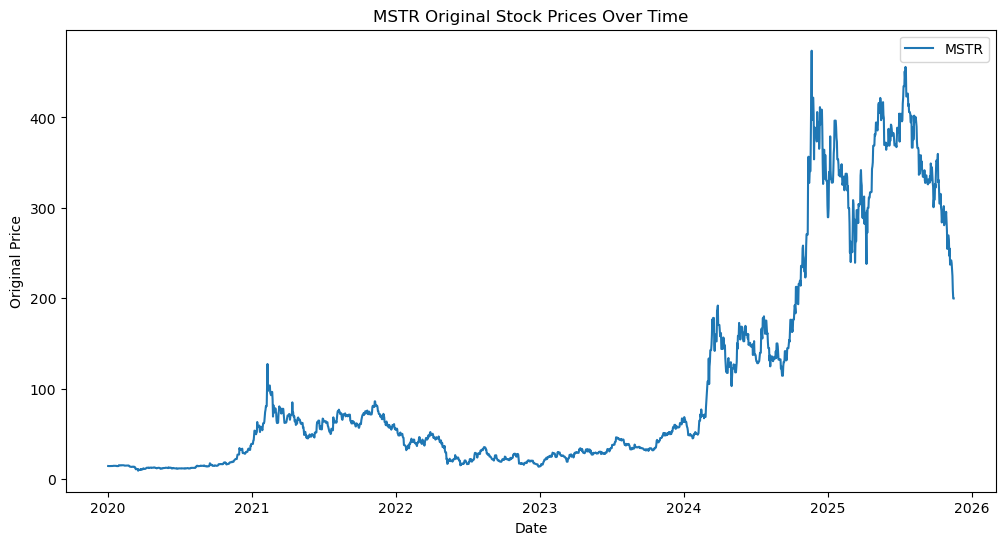

In [70]:
# plot MSTR original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('MSTR Original Stock Prices Over Time')
plt.legend()
plt.show()

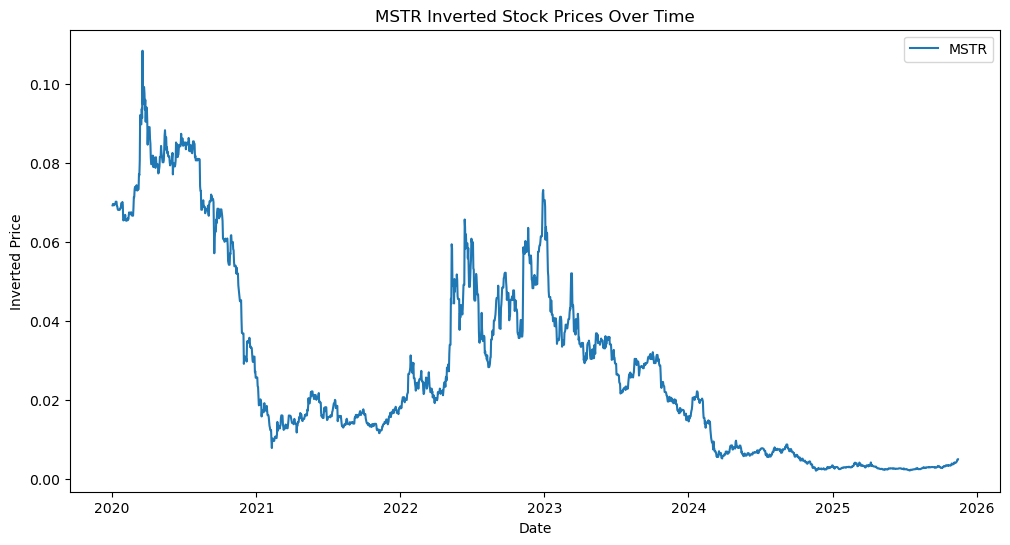

In [71]:
# plot MSTR inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('MSTR Inverted Stock Prices Over Time')
plt.legend()
plt.show()

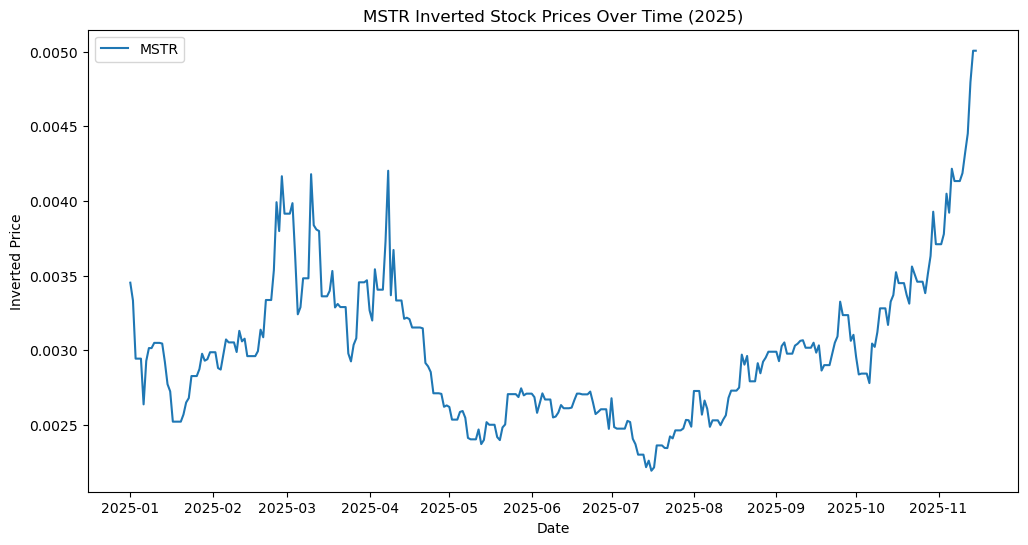

In [72]:
# plot MSTR inverted prices, for year current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(inverted_df[inverted_df.index.year == current_year].index, inverted_df[inverted_df.index.year == current_year]['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title(f'MSTR Inverted Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()

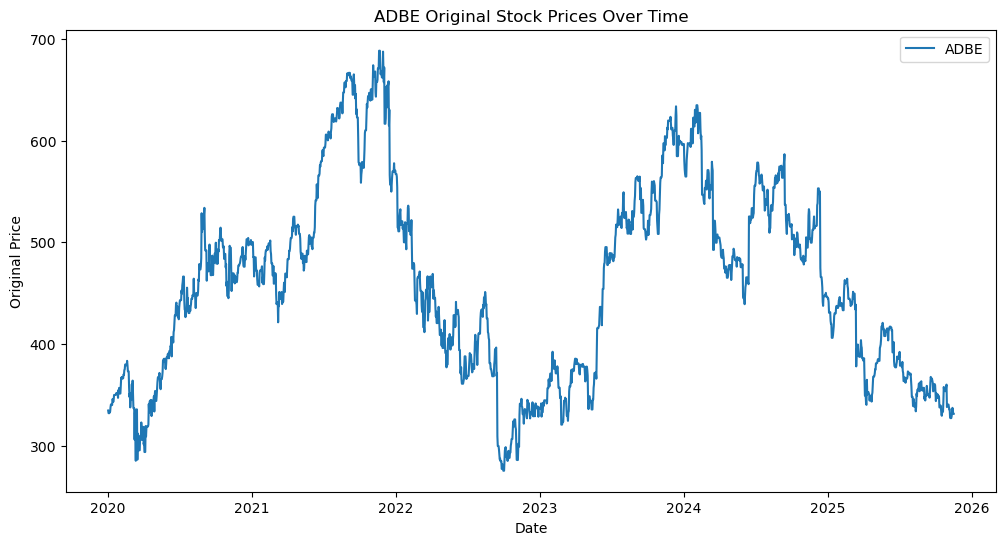

In [73]:
# plot ADBE original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('ADBE Original Stock Prices Over Time')
plt.legend()
plt.show()

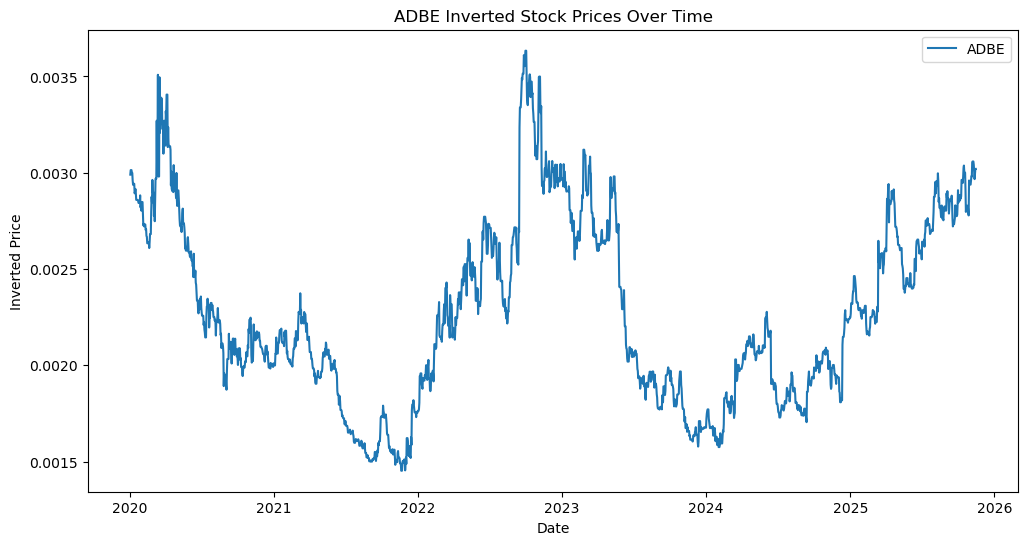

In [74]:
# plot ADBE inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('ADBE Inverted Stock Prices Over Time')
plt.legend()
plt.show()

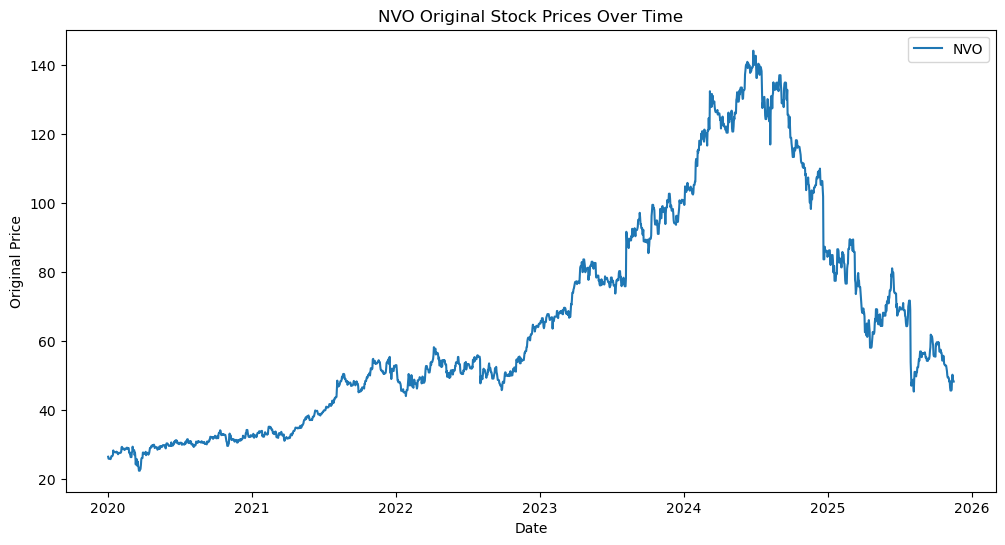

In [75]:
# plot NVO original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('NVO Original Stock Prices Over Time')
plt.legend()
plt.show()

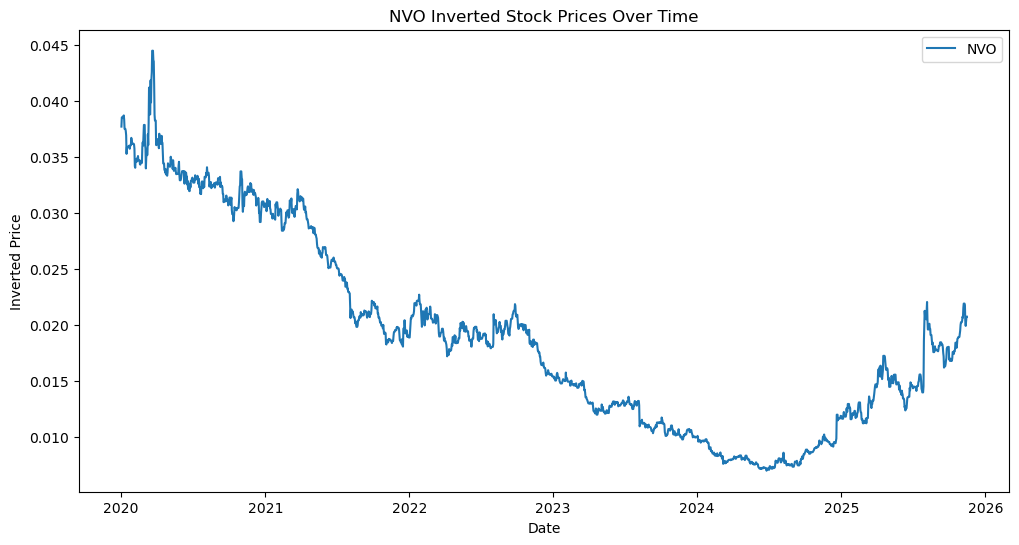

In [76]:
# plot NVO inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('NVO Inverted Stock Prices Over Time')
plt.legend()
plt.show()

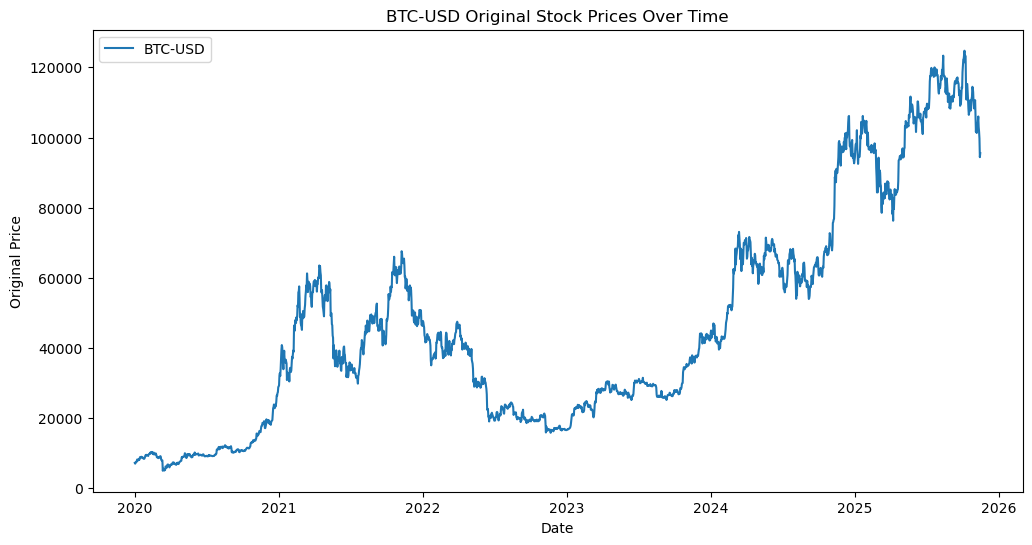

In [77]:
# plot BTC-USD original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('BTC-USD Original Stock Prices Over Time')
plt.legend()
plt.show()

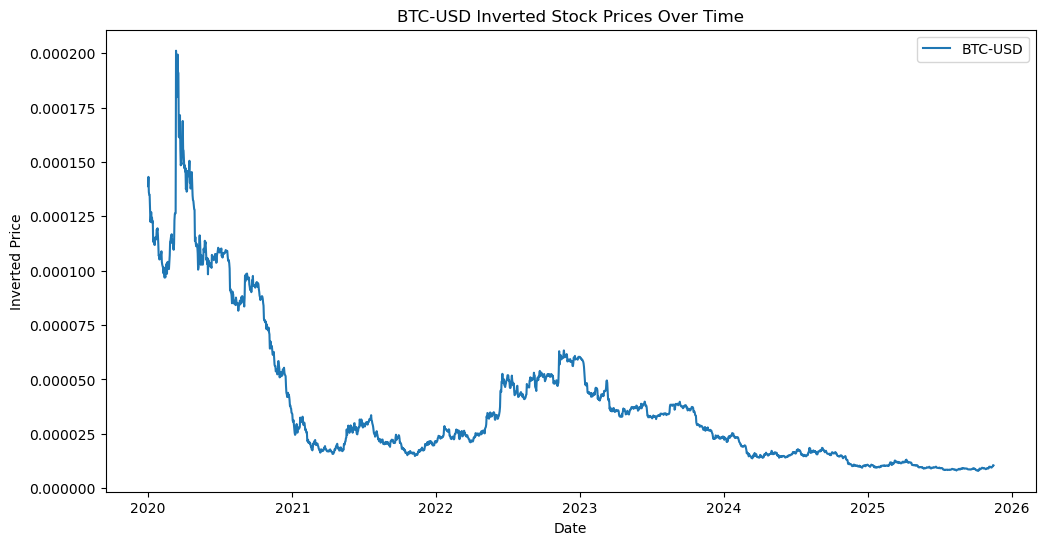

In [78]:
# plot BTC-USD inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('BTC-USD Inverted Stock Prices Over Time')
plt.legend()
plt.show()

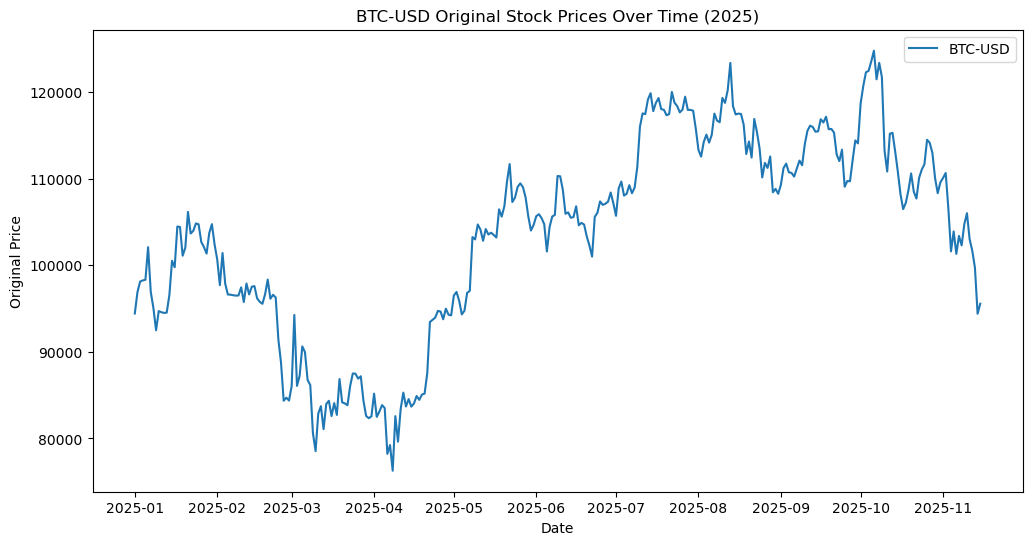

In [79]:
# plot BTC-USD original prices current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(df[df.index.year == current_year].index, df[df.index.year == current_year]['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title(f'BTC-USD Original Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()

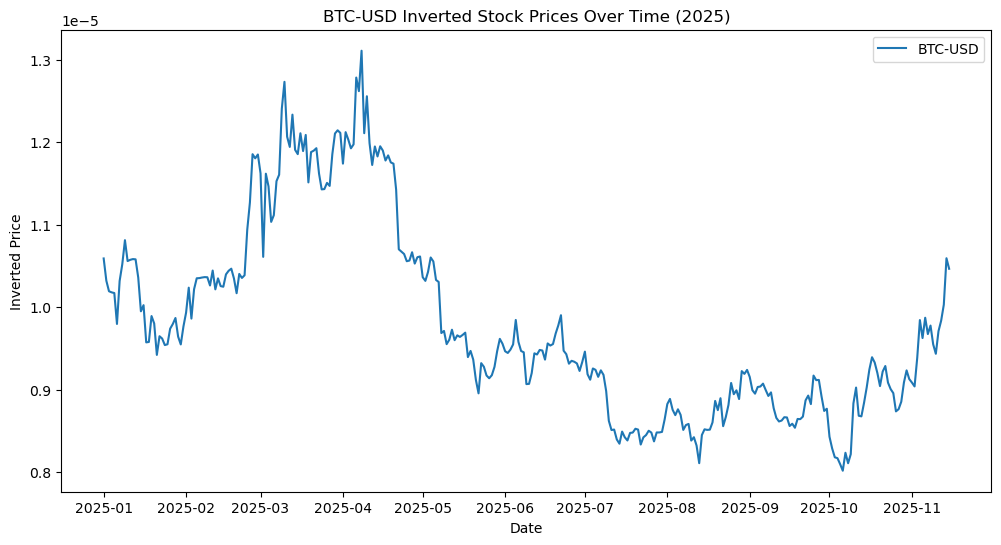

In [80]:
# plot BTC-USD inverted prices current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(inverted_df[inverted_df.index.year == current_year].index, inverted_df[inverted_df.index.year == current_year]['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title(f'BTC-USD Inverted Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()

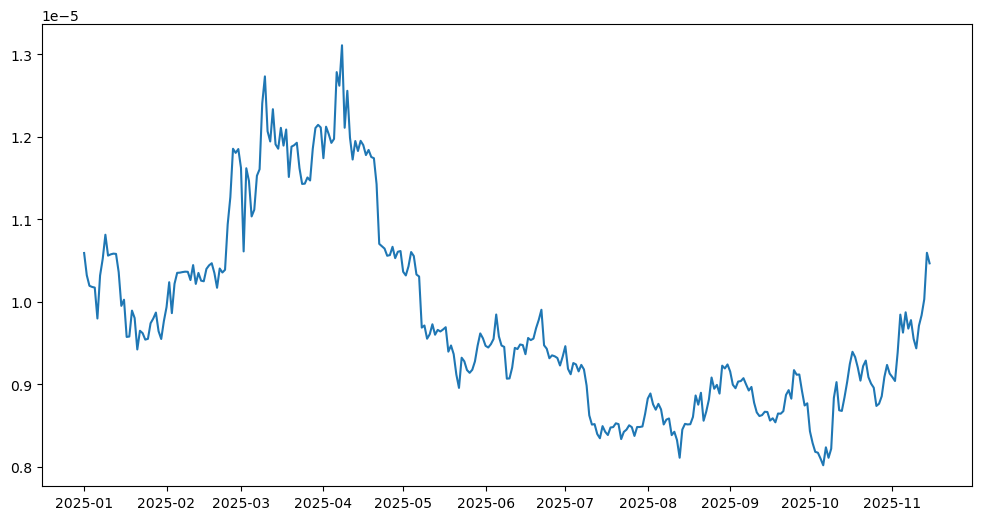

In [82]:
# plot BTC-USD inverted prices current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(inverted_df[inverted_df.index.year == current_year].index, inverted_df[inverted_df.index.year == current_year]['BTC-USD'], label='BTC-USD')
# plt.xlabel('Date')
# plt.ylabel('Inverted Price')
# plt.title(f'BTC-USD Inverted Stock Prices Over Time ({current_year})')
# plt.legend()
plt.show()